### Loading Dataset

In [369]:
import pandas as pd

# loading data in

train_df = pd.read_csv('train.csv', delimiter = ';')
test_df = pd.read_csv('test.csv', delimiter = ';')

print("Training data shape:", train_df.shape)
train_df.head()

Training data shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [370]:
# data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [371]:
#summary stats

train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [372]:
# null values?

train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Questions to explore

1. Which variables are most predictive of a subscription?
2. How well can we predict y using a logistic regression or tree-based model?
3. What features are most important in predicting outcomes?
4. How well can we make a model predict subsciptions?

### Data Overview / Cleaning

In [373]:
# counting unknown values in each column of training data

for col in train_df.columns:
        if train_df[col].dtype == 'object':
            unknown_count = (train_df[col] == 'unknown').sum()
            if unknown_count > 0:
                print(f"{col}: {unknown_count} unknowns ({round(unknown_count / len(train_df) * 100, 2)}%)")

job: 288 unknowns (0.64%)
education: 1857 unknowns (4.11%)
contact: 13020 unknowns (28.8%)
poutcome: 36959 unknowns (81.75%)


In [374]:
# dropping rows with unknown values for job and education since proportion of unknowns is small
# keeping unknown as a category for contact and poutcome since unknowns are large proportions here

train_df = train_df[(train_df['job'] != 'unknown') & (train_df['education'] != 'unknown')]
print("New shape of data fram after dropping unknowns:", train_df.shape)

New shape of data fram after dropping unknowns: (43193, 17)


In [375]:
# binary encoding for yes/no columns

binary_map = {'yes': 1, 'no': 0}
train_df['default'] = train_df['default'].map(binary_map)
train_df['housing'] = train_df['housing'].map(binary_map)
train_df['loan'] = train_df['loan'].map(binary_map)
train_df['y'] = train_df['y'].map(binary_map)

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0


In [376]:
# one-hot encoding for remaining catrogorical variables

train_df = pd.get_dummies(train_df,
                          columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'],
                          drop_first = True)

train_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
5,35,0,231,1,0,5,139,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
6,28,0,447,1,1,5,217,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [377]:
# class imbalance check

train_df['y'].value_counts(normalize = True) * 100

y
0    88.375431
1    11.624569
Name: proportion, dtype: float64

### Exploratroy Data Analysis

In [378]:
# i already encoded the catogorical features, so i will important the data again into a new data frame for EDA

eda_df = pd.read_csv('train.csv', delimiter=';')

# drop rows that i dropped earlier
eda_df = eda_df[(eda_df['job'] != 'unknown') & (eda_df['education'] != 'unknown')]

# map 'y' to binary values again
eda_df['y'] = eda_df['y'].map({'yes': 1, 'no': 0})


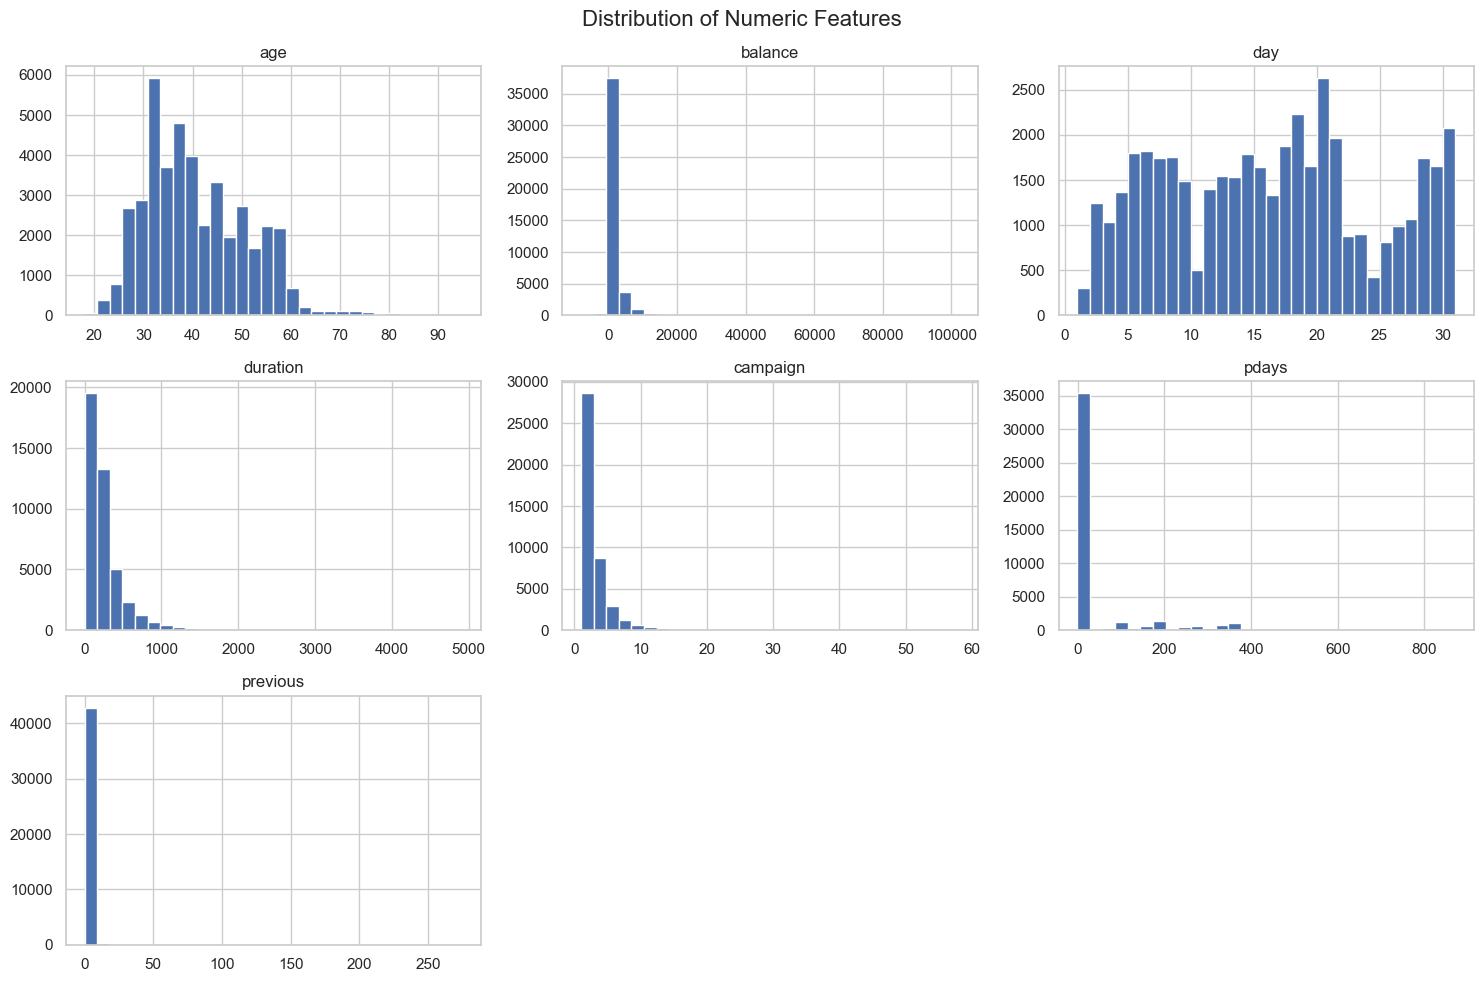

In [379]:
# checking feature distributions for the numerical data

import matplotlib.pyplot as plt
import seaborn as sns

# plotting style

sns.set(style = 'whitegrid')

# plotting numeric features
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
eda_df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

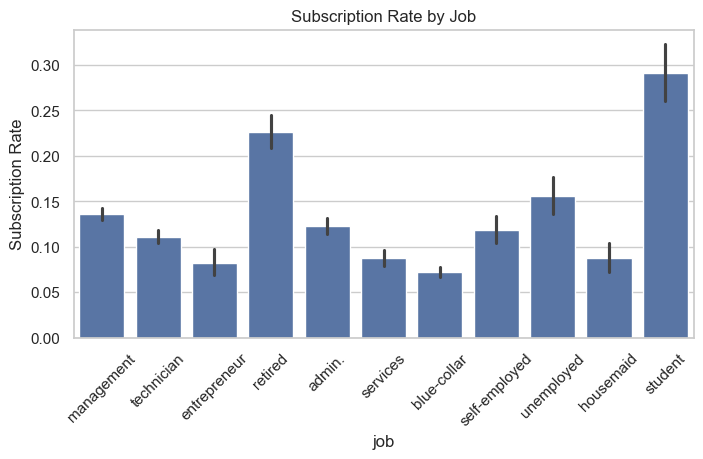

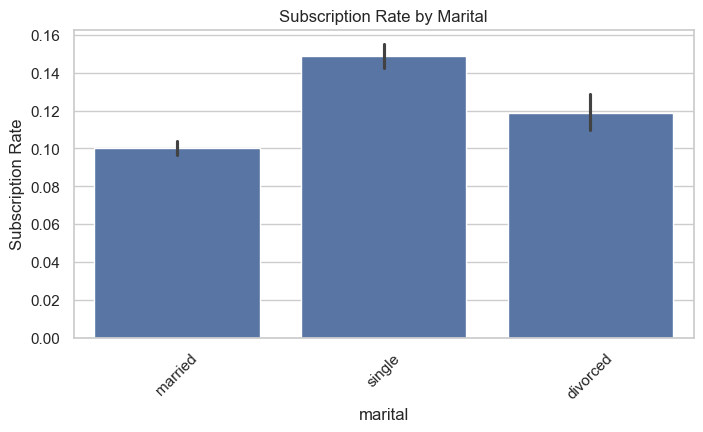

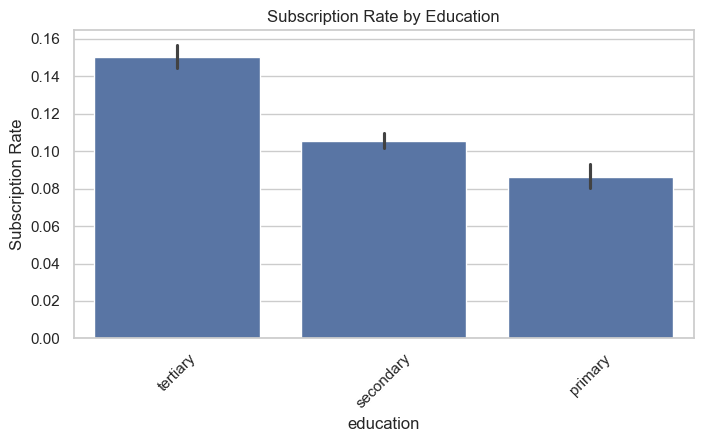

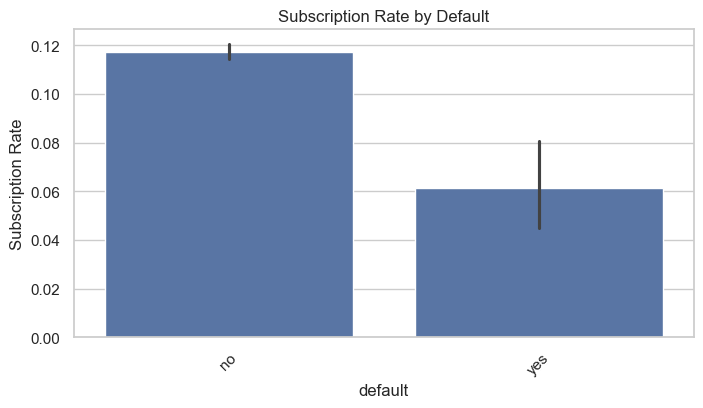

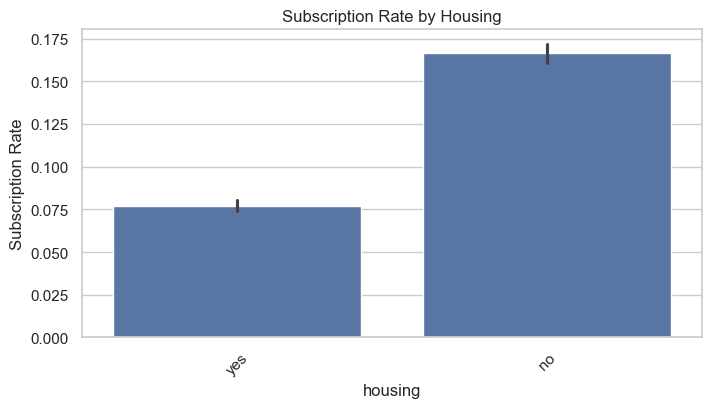

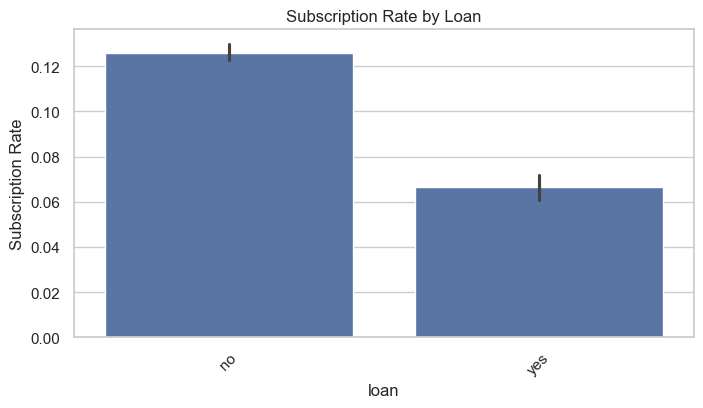

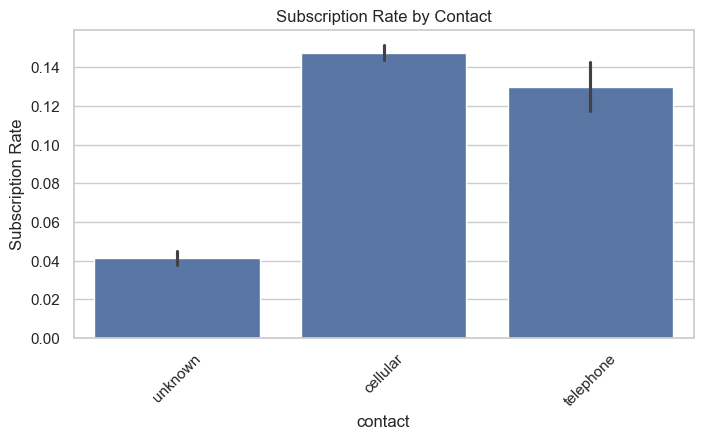

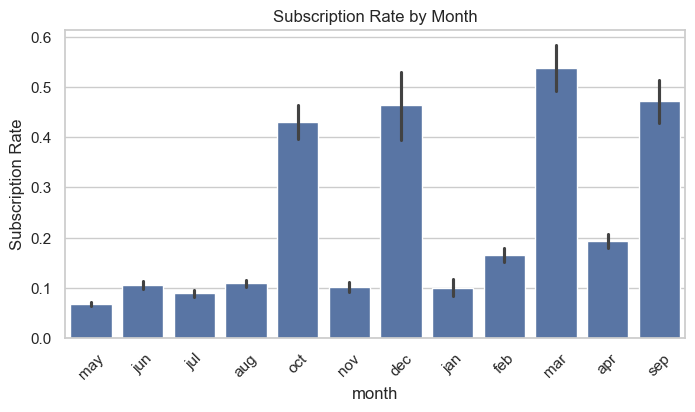

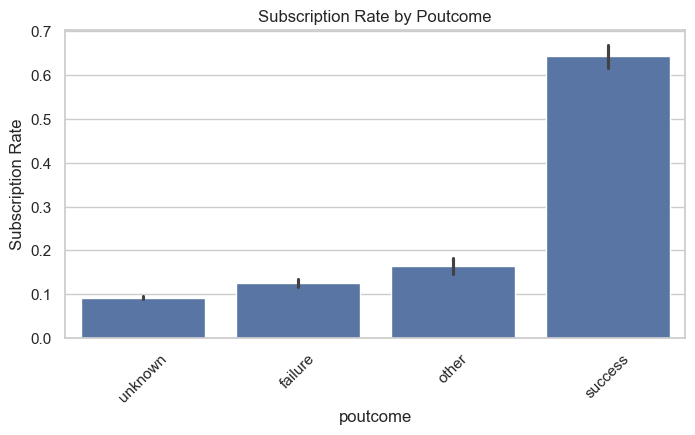

In [380]:
# bar plots for term deposit subscription rate for each categorical variable

for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=eda_df, x=col, y='y')
    plt.title(f"Subscription Rate by {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.ylabel("Subscription Rate")
    plt.show()


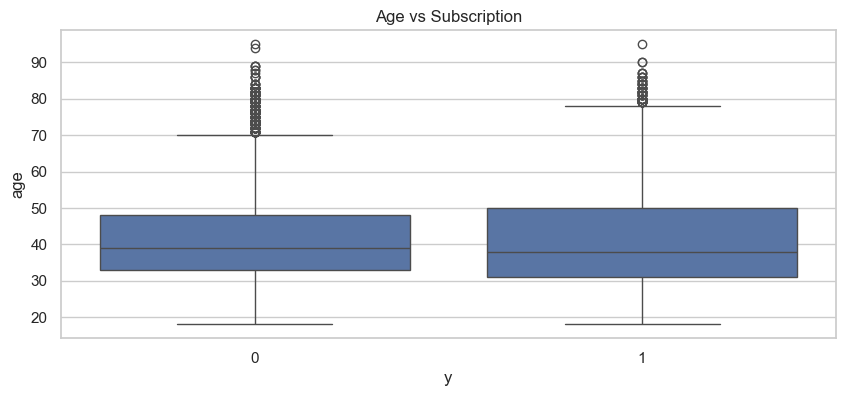

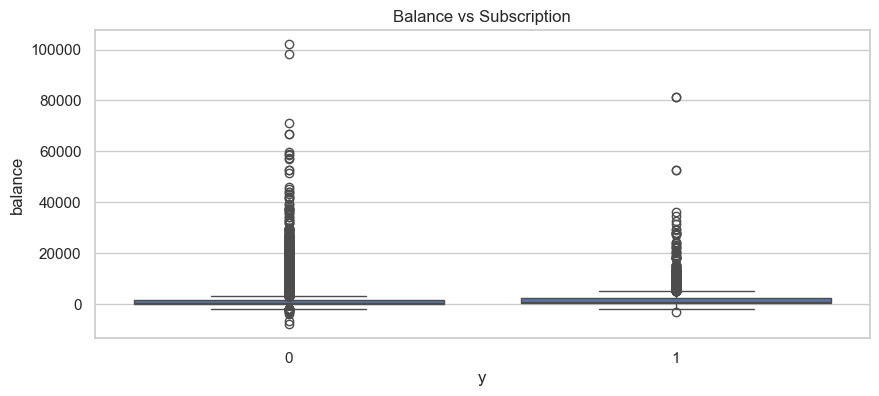

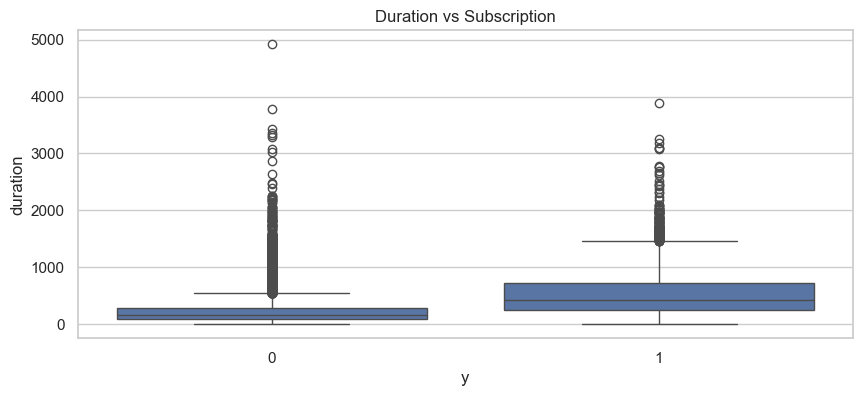

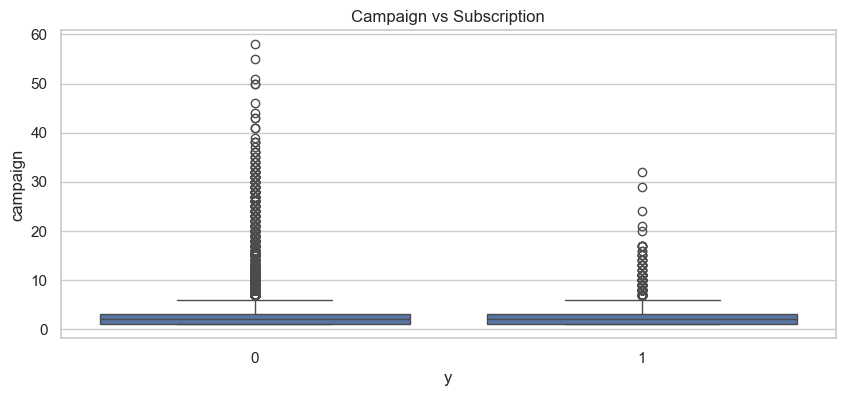

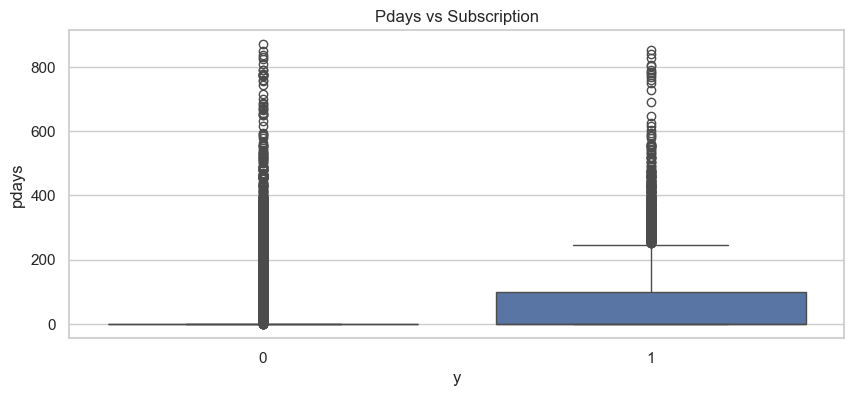

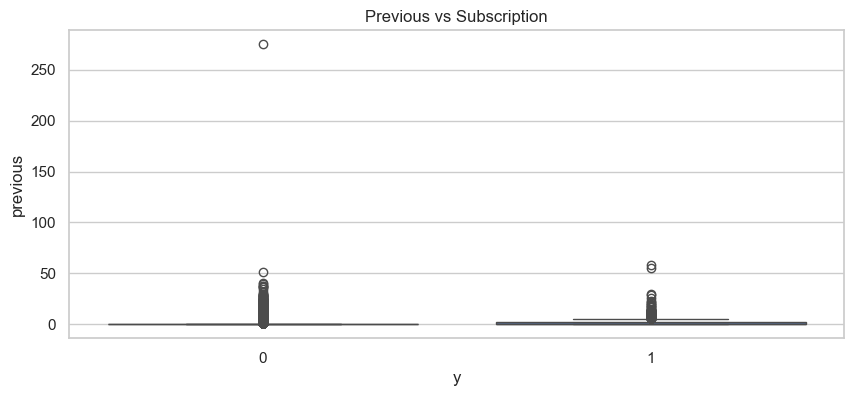

In [381]:
# plots for term deposit subscription rate for each numerical variable (except for 'day,' because the day of the month is not very informative)
# note that duration of the call will be very predictive, but this is not known until the call is already complete

numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='y', y=col, data=eda_df)
    plt.title(f"{col.capitalize()} vs Subscription")
    plt.show()


### Modeling

In [382]:
# convert all boolean columns (true and false) to integers (1 and 0) because the one-hot encoding encoded as true/false

train_df_encoded = train_df.copy()  

# finding boolean columns
bool_cols = train_df_encoded.select_dtypes(include='bool').columns
train_df_encoded[bool_cols] = train_df_encoded[bool_cols].astype(int)

# checking that all features are numeric
print(train_df_encoded.dtypes.value_counts())


int64    41
Name: count, dtype: int64


In [383]:
from sklearn.model_selection import train_test_split

# defining features

X = train_df_encoded.drop(columns=['y'])
y = train_df_encoded['y']

# do an 80/20 split for model training / validation, make sure to stratify y because of class imbalance

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

Train shape: (34554, 40)
Validation shape: (8639, 40)


In [384]:
# start with logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

logreg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 1000))
])

# train the model

logreg_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=1000))])

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7635
           1       0.65      0.37      0.47      1004

    accuracy                           0.90      8639
   macro avg       0.79      0.67      0.71      8639
weighted avg       0.89      0.90      0.89      8639



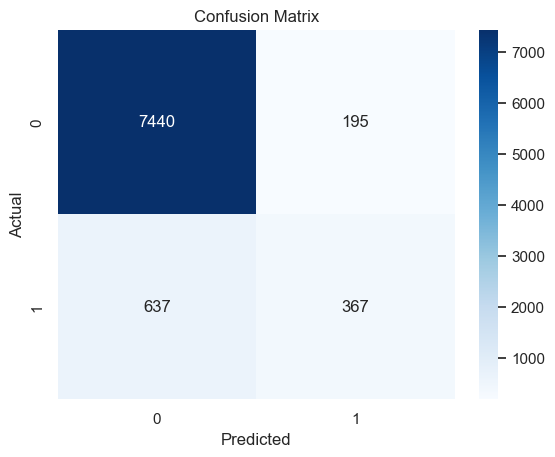

ROC AUC Score: 0.9143534571602261


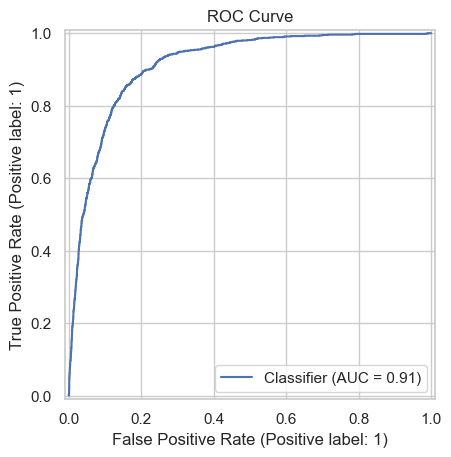

In [385]:
# evaluate model performance

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve

# predict labels and probabilities
y_pred = logreg_model.predict(X_val)
y_proba = logreg_model.predict_proba(X_val)[:, 1]

# performance metrics

print("Classification Report:\n", classification_report(y_val, y_pred))

# confusion matrix

sns.heatmap(confusion_matrix(y_val, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC

roc_auc = roc_auc_score(y_val, y_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve

RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()

In [386]:
# interpret feature importance

import numpy as np

# getting model coefficients
coefficients = logreg_model.named_steps['log_reg'].coef_[0]
features = X.columns

# creating dataframe of feature importances

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)
})

# sorting by importance

coef_df = coef_df.sort_values(by = 'AbsCoefficient', ascending = False)
coef_df.head(10)

,Feature,Coefficient,AbsCoefficient
6,duration,1.080048,1.080048
25,contact_unknown,-0.724847,0.724847
38,poutcome_success,0.397300,0.397300
3,housing,-0.331394,0.331394
30,month_jul,-0.289682,0.289682
7,campaign,-0.276635,0.276635
34,month_nov,-0.232876,0.232876
26,month_aug,-0.221635,0.221635
29,month_jan,-0.218602,0.218602
32,month_mar,0.186581,0.186581


### Dropping 'Duration' Feature

In [387]:
# as mentioned before, duration is post-call information, so it wouldn't help us predict a success ahead of time
# so, we will run the model again without duration

# dropping 'duration' before splitting
newX = train_df_encoded.drop(columns=['y', 'duration'])
newy = train_df_encoded['y']

# train-test split
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    newX, newy, test_size=0.2, stratify=newy, random_state=42
)

# train the model
logreg_model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter = 1000))
])

# fit logistic regression as before
logreg_model2.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=1000))])

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7635
           1       0.64      0.19      0.29      1004

    accuracy                           0.89      8639
   macro avg       0.77      0.59      0.62      8639
weighted avg       0.87      0.89      0.87      8639



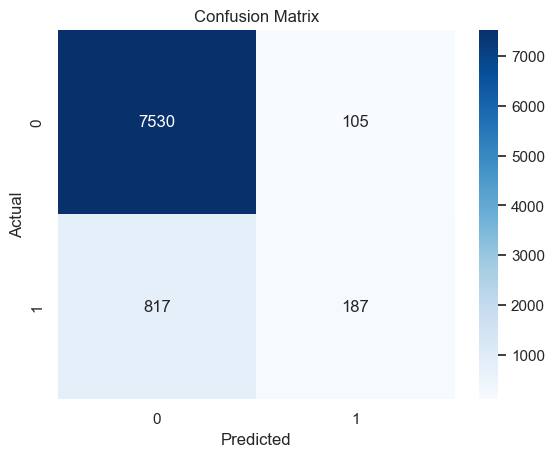

ROC AUC Score: 0.765241457222844


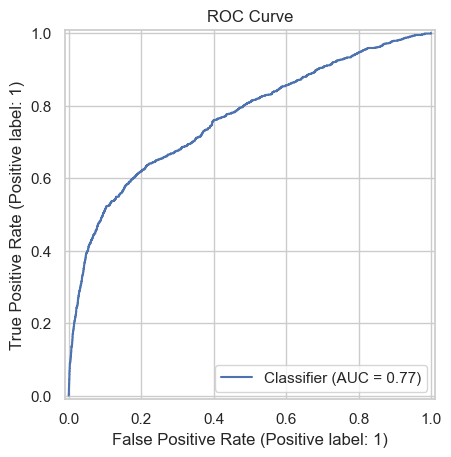

In [388]:
# evaluate model performance



# predict labels and probabilities
y_pred2 = logreg_model2.predict(X_val2)
y_proba2 = logreg_model2.predict_proba(X_val2)[:, 1]

# performance metrics

print("Classification Report:\n", classification_report(y_val2, y_pred2))

# confusion matrix

sns.heatmap(confusion_matrix(y_val2, y_pred2), annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC

roc_auc2 = roc_auc_score(y_val2, y_proba2)
print("ROC AUC Score:", roc_auc2)

# ROC Curve

RocCurveDisplay.from_predictions(y_val2, y_proba2)
plt.title("ROC Curve")
plt.show()

In [389]:
# interpret feature importance

# getting model coefficients
coefficients2 = logreg_model2.named_steps['log_reg'].coef_[0]
features2 = newX.columns

# creating dataframe of feature importances

coef_df2 = pd.DataFrame({
    'Feature': features2,
    'Coefficient': coefficients2,
    'AbsCoefficient': np.abs(coefficients2)
})

# sorting by importance

coef_df2 = coef_df2.sort_values(by = 'AbsCoefficient', ascending = False)
coef_df2.head(10)

,Feature,Coefficient,AbsCoefficient
24,contact_unknown,-0.602292,0.602292
37,poutcome_success,0.385281,0.385281
3,housing,-0.271079,0.271079
25,month_aug,-0.270772,0.270772
6,campaign,-0.261511,0.261511
29,month_jul,-0.247396,0.247396
33,month_nov,-0.228599,0.228599
32,month_may,-0.198708,0.198708
28,month_jan,-0.182702,0.182702
22,education_tertiary,0.142438,0.142438


### Recall is Poor for Class 1, so we Will Try a Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7635
           1       0.62      0.21      0.31      1004

    accuracy                           0.89      8639
   macro avg       0.76      0.59      0.63      8639
weighted avg       0.87      0.89      0.87      8639


ROC AUC Score: 0.7857


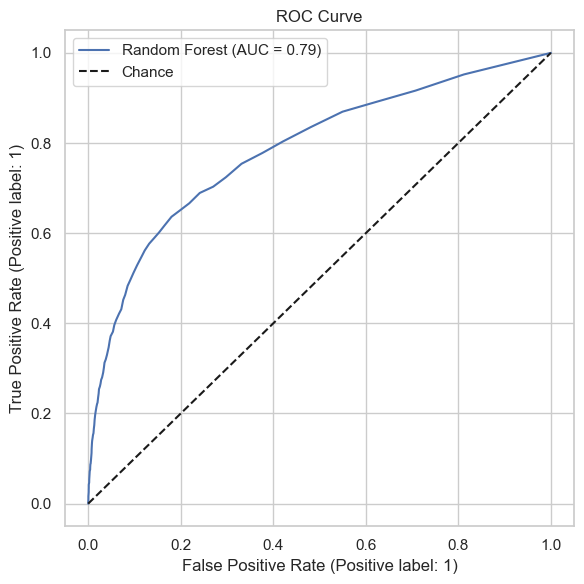

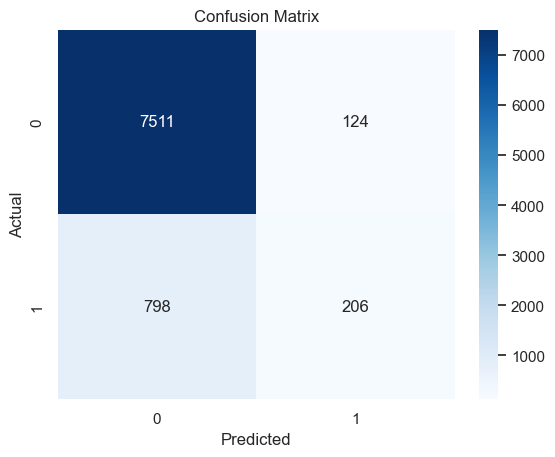

In [390]:
# random forest (without 'duration' feature, assuming we want to predict term deposit subscription before
# we have called the customer)

# training model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = None,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1)
rf_model.fit(X_train2, y_train2)

# predicting labels & probabilities

y_pred = rf_model.predict(X_val2)
y_proba = rf_model.predict_proba(X_val2)[:, 1]

# classification report

print("Classification Report:\n")
print(classification_report(y_val2, y_pred))

# roc auc score

auc_score = roc_auc_score(y_val2, y_proba)
print(f"\nROC AUC Score: {auc_score:.4f}")

# plot roc curve

fpr, tpr, thresholds = roc_curve(y_val2, y_proba)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, label = f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label = "Chance")
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plotting confusion matrix
sns.heatmap(confusion_matrix(y_val2, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Finding a New Threshold to Improve Recall (at the Cost of Precision) and F1 Score

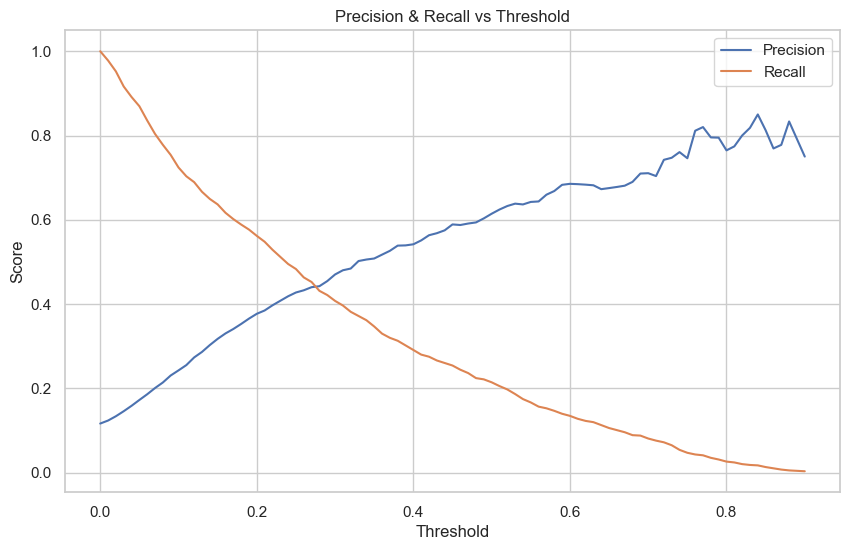

In [391]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [392]:
# new threshold and classifcation report

from sklearn.metrics import f1_score

# optimize f1 score where class 1 f1 score is greatest
f1_scores = [f1_score(y_val, y_proba >= t) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best F1 threshold: {best_threshold:.2f}, F1: {f1_scores[best_idx]:.2f}")

threshold = 0.23
y_pred_new = (y_proba >= threshold).astype(int)


print(classification_report(y_val, y_pred_new))

Best F1 threshold: 0.23, F1: 0.45
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7635
           1       0.41      0.51      0.45      1004

    accuracy                           0.86      8639
   macro avg       0.67      0.71      0.69      8639
weighted avg       0.87      0.86      0.86      8639



### Trying XGBoost

In [393]:
from xgboost import XGBClassifier

# training XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.1,       # shrinkage rate
    max_depth=4,             # depth of each tree
    subsample=0.8,           # random sampling of rows
    colsample_bytree=0.8,    # random sampling of features
    random_state=42,
    scale_pos_weight=len(y_train2[y_train2==0]) / len(y_train2[y_train2==1])  # handle class imbalance
)

xgb_model.fit(X_train2, y_train2)

# predictions
y_proba = xgb_model.predict_proba(X_val2)[:, 1]

# finding best threshold for F1
prec, rec, thresh = precision_recall_curve(y_val2, y_proba)
f1_scores = 2*prec*rec/(prec+rec+1e-9)
best_idx = np.argmax(f1_scores)
best_thresh = thresh[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_thresh:.2f}, Best F1: {best_f1:.2f}")

# applying threshold
y_pred = (y_proba >= best_thresh).astype(int)

# evaluating
print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_proba))

Best threshold: 0.62, Best F1: 0.50
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7635
           1       0.46      0.54      0.50      1004

    accuracy                           0.87      8639
   macro avg       0.70      0.73      0.71      8639
weighted avg       0.88      0.87      0.88      8639

ROC AUC: 0.8072666765811672


### Time for Testing

In [394]:
# splitting into train+validate 80% and test 20%

X_trainval, X_test, y_trainval, y_test = train_test_split(
    newX, newy, test_size=0.2, random_state=42, stratify=y
)

# splitting train+validate into train 70% and validate 30%
# giving 60% train, 20% validate, 20% test

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)


In [395]:
# training XGBoost on new split

# training XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.1,       # shrinkage rate
    max_depth=4,             # depth of each tree
    subsample=0.8,           # random sampling of rows
    colsample_bytree=0.8,    # random sampling of features
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # handle class imbalance
)

xgb_model.fit(X_train, y_train)

# predictions
y_proba = xgb_model.predict_proba(X_val)[:, 1]

# finding best threshold for F1
prec, rec, thresh = precision_recall_curve(y_val, y_proba)
f1_scores = 2*prec*rec/(prec+rec+1e-9)
best_idx = np.argmax(f1_scores)
best_thresh = thresh[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Best threshold: {best_thresh:.2f}, Best F1: {best_f1:.2f}")

# applying threshold
y_pred = (y_proba >= best_thresh).astype(int)

# evaluating
print(classification_report(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_proba))

Best threshold: 0.60, Best F1: 0.47
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7635
           1       0.42      0.52      0.47      1004

    accuracy                           0.86      8639
   macro avg       0.68      0.71      0.69      8639
weighted avg       0.88      0.86      0.87      8639

ROC AUC: 0.7855047393921366


In [396]:
# test evaluation

y_test_proba = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= 0.60).astype(int)


print(classification_report(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_proba))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7635
           1       0.45      0.55      0.50      1004

    accuracy                           0.87      8639
   macro avg       0.69      0.73      0.71      8639
weighted avg       0.88      0.87      0.88      8639

ROC AUC: 0.8009087422412511


### Final Test Set

In [397]:
# actual test set

# dropping rows with unknown values for job and education since proportion of unknowns is small
# keeping unknown as a category for contact and poutcome since unknowns are large proportions here

test_df = test_df[(test_df['job'] != 'unknown') & (test_df['education'] != 'unknown')]

# binary encoding for yes/no columns

binary_map = {'yes': 1, 'no': 0}
test_df['default'] = test_df['default'].map(binary_map)
test_df['housing'] = test_df['housing'].map(binary_map)
test_df['loan'] = test_df['loan'].map(binary_map)
test_df['y'] = test_df['y'].map(binary_map)

# one-hot encoding for remaining catrogorical variables

test_df = pd.get_dummies(test_df,
                          columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'],
                          drop_first = True)

# convert all boolean columns (true and false) to integers (1 and 0) because the one-hot encoding encoded as true/false

test_df_encoded = test_df.copy()  

# finding boolean columns
bool_cols = test_df_encoded.select_dtypes(include='bool').columns
test_df_encoded[bool_cols] = test_df_encoded[bool_cols].astype(int)

# as mentioned before, duration is post-call information, so it wouldn't help us predict a success ahead of time
# so, we will run the model again without duration

# dropping 'duration' before splitting
X = test_df_encoded.drop(columns=['y', 'duration'])
y = test_df_encoded['y']

# test model

y_test_proba = xgb_model.predict_proba(X)[:, 1]
y_test_pred = (y_test_proba >= 0.60).astype(int)


print(classification_report(y, y_test_pred))
print("ROC AUC:", roc_auc_score(y, y_test_proba))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3813
           1       0.46      0.55      0.50       498

    accuracy                           0.87      4311
   macro avg       0.70      0.73      0.71      4311
weighted avg       0.88      0.87      0.88      4311

ROC AUC: 0.8314822363147845


# Report of Results

### Goal
Predict whether a customer will subscribe to a term deposit campaign.

### Approach

Split data into train (80%), test (20%).

Tried Logistic Regression, Random Forest, and XGBoost.

Chose XGBoost

Split data into train (60%), validation (20%), test (20%) for potential further tuning and validation (ended up not really needing this).

Evaluated models using precision, recall, F1 score, and ROC AUC.

Tuned thresholds for optimal balance of precision/recall.

### Results

Logistic regression: F1 ~0.29, ROC AUC ~0.77.

Random forest: F1 ~0.31, ROC AUC ~0.79.

XGBoost: best performance, F1 = 0.50, ROC AUC = 0.81.

### Test Performance

On the held-out test set, the XGBoost model achieved:

Precision: 0.46

Recall: 0.55

F1: 0.50

ROC AUC: 0.8315

### Interpretation

Threshold of 0.60 balances precision (avoiding wasted calls) and recall (capturing actual subscribers).

Model generalizes well (validation vs test close).

Final model is suitable for deployment, with the trade-off between recall and precision adjustable depending on campaign goals.